# LT-DSC-Skript


## required libraries 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ltdsc_lib import *

Wähle manuell die relevanten Segmentpositionen aus in Form einer Liste. Z.B für Segment 6-8 und 14-16:

`measure_segments = [[6,8],[14,16]]`

In [2]:
measure_segments =  [ [10,12], [18,20]]

thaw_temp_range  =  [ [-57, 10] ] # in °C


T_range = [[[-57,-56], [9,10]], [[-57,-56], [9,10]]]

## select a single measurement

  Found a valid experiment file. Encoding: UTF-16
  Loading 1.1-20nm
    - loaded measurement 1.1-20nm from 2022-01-05 09:35:00
    - The data contains 5.0 measurements per s


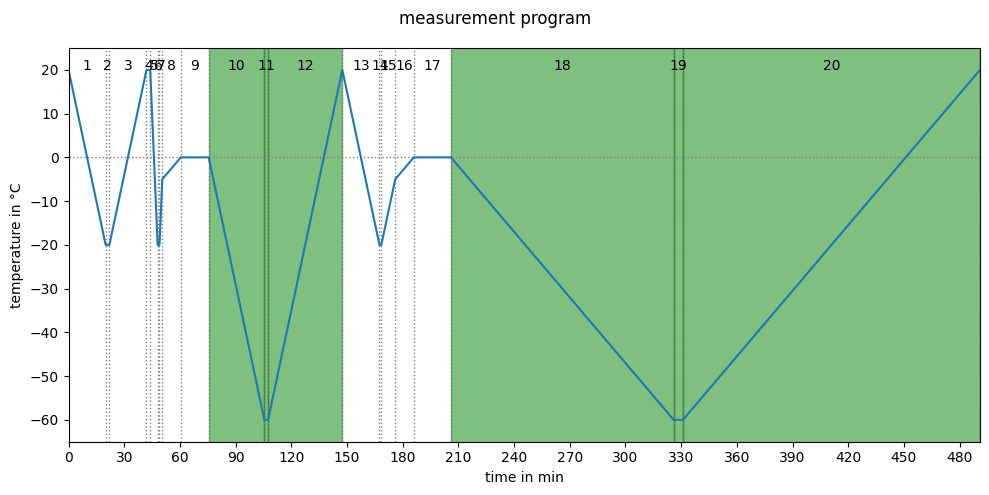

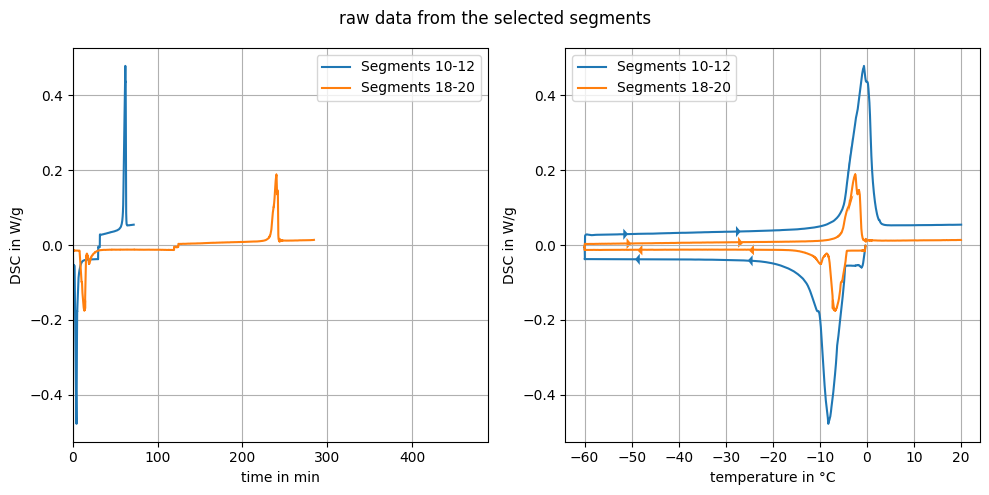

  Segment 12 baseline: y = 0.00076521*x + 0.02643938; R-squared value: 0.99997919
  Segment 20 baseline: y = 0.00006741*x + 0.00300846; R-squared value: 0.99954284


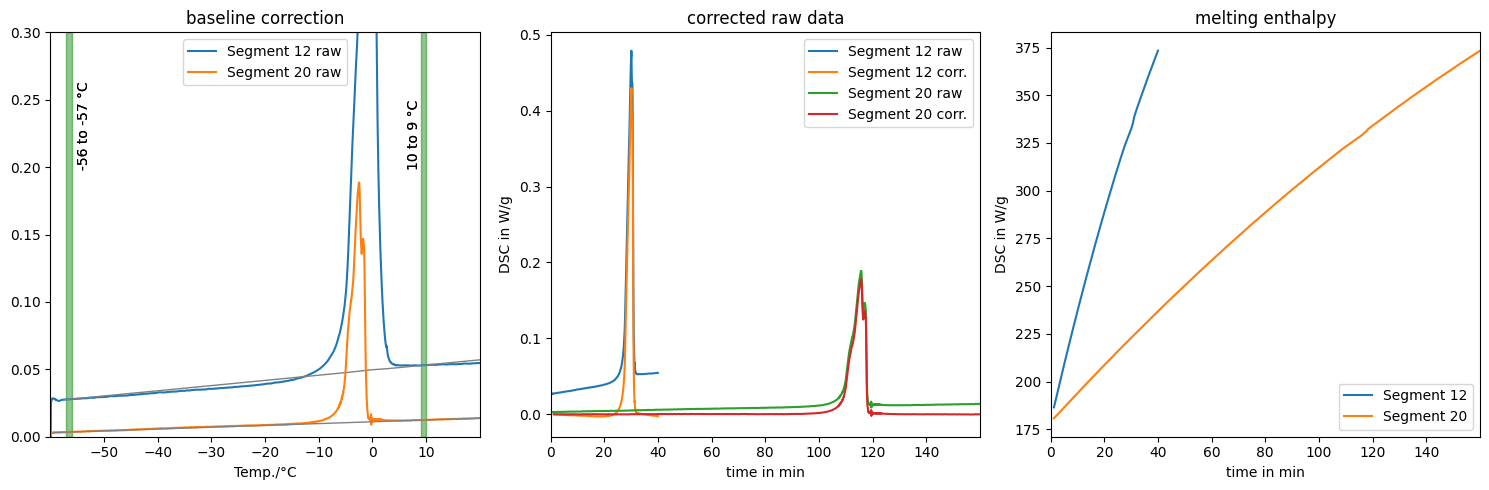

  (manual) ice mass/volume in segment 12 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 174.9 mg/g ; 190.8 µl/g
  (manual) ice mass/volume in segment 20 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 188.2 mg/g ; 205.1 µl/g


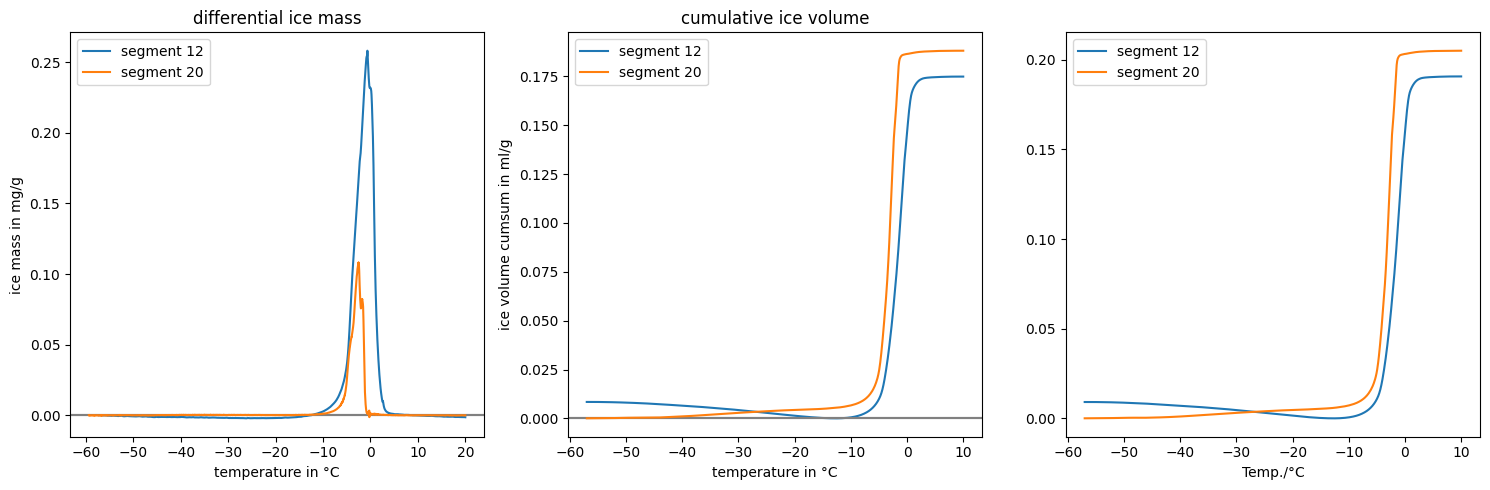

  ice mass difference: 13.24 mg/g


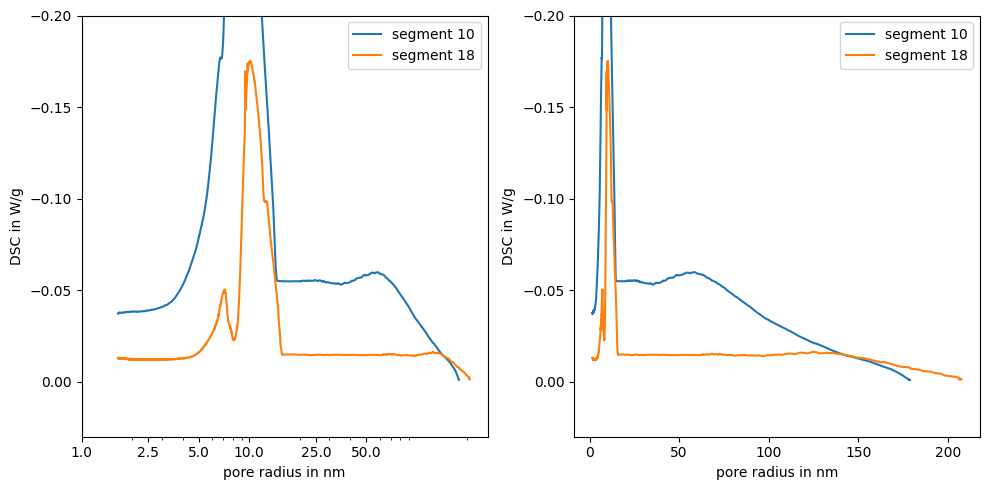

In [3]:
file = select_single_file()
experiment = ltdsc_measurement(file, measure_segments, thaw_temp_range, ignore_first_n_min = 1.25, T_range = T_range, verbose=True)

## The following code is individual for the selected dataset

4 TXT Dokumente gefunden.

ExpDat_1.1-20nm.txt
  Found a valid experiment file. Encoding: UTF-16
  Loading 1.1-20nm
    - loaded measurement 1.1-20nm from 2022-01-05 09:35:00
    - The data contains 5.0 measurements per s


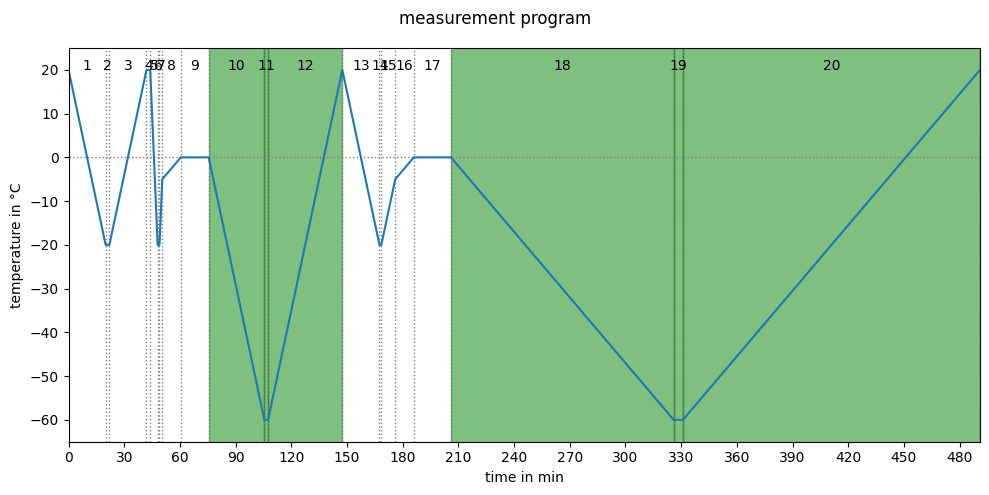

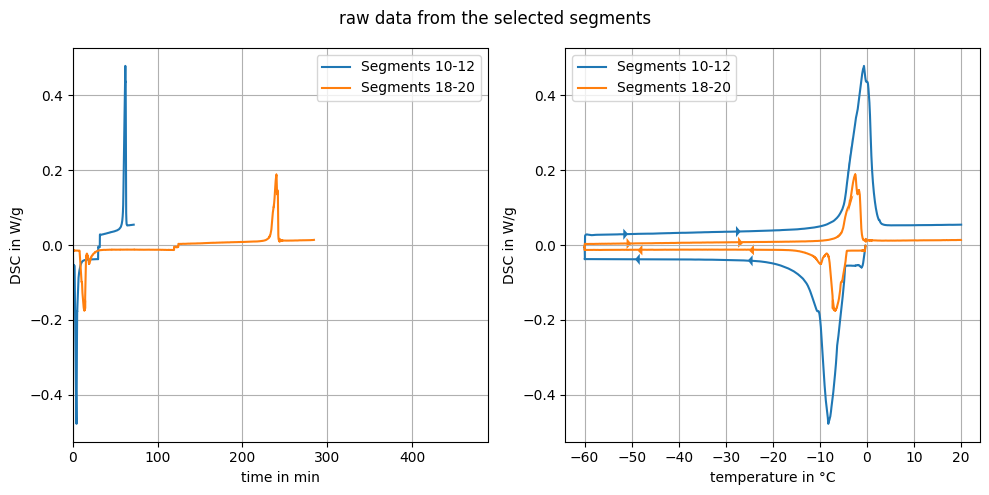

  Segment 12 baseline: y = 0.00076521*x + 0.02643938; R-squared value: 0.99997919
  Segment 20 baseline: y = 0.00006741*x + 0.00300846; R-squared value: 0.99954284


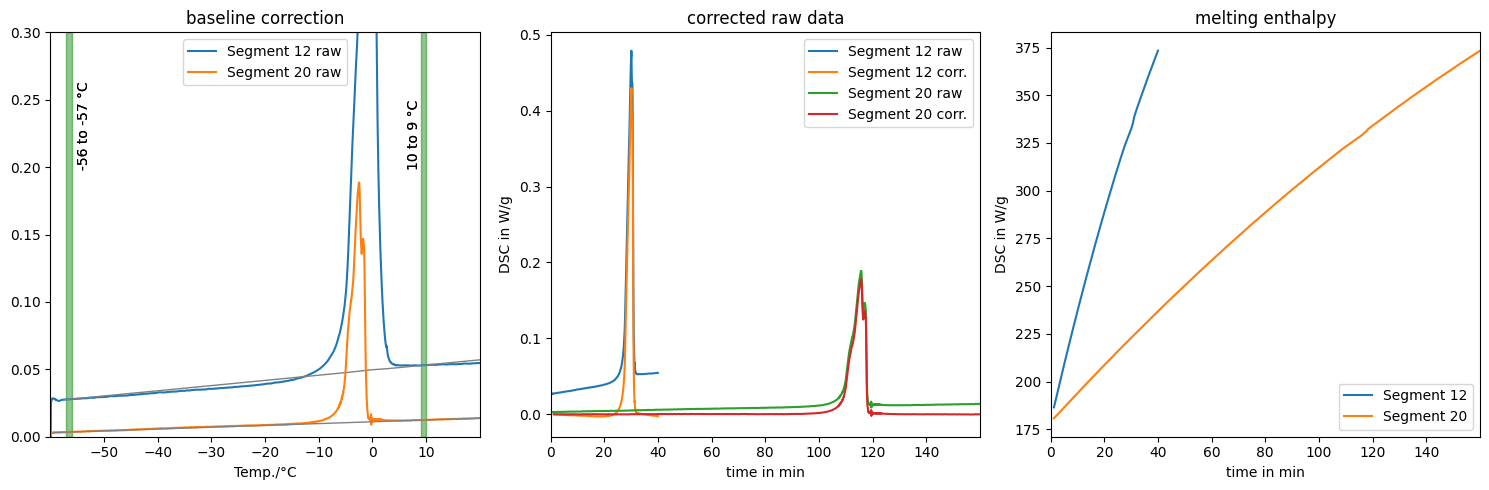

  (manual) ice mass/volume in segment 12 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 174.9 mg/g ; 190.8 µl/g
  (manual) ice mass/volume in segment 20 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 188.2 mg/g ; 205.1 µl/g


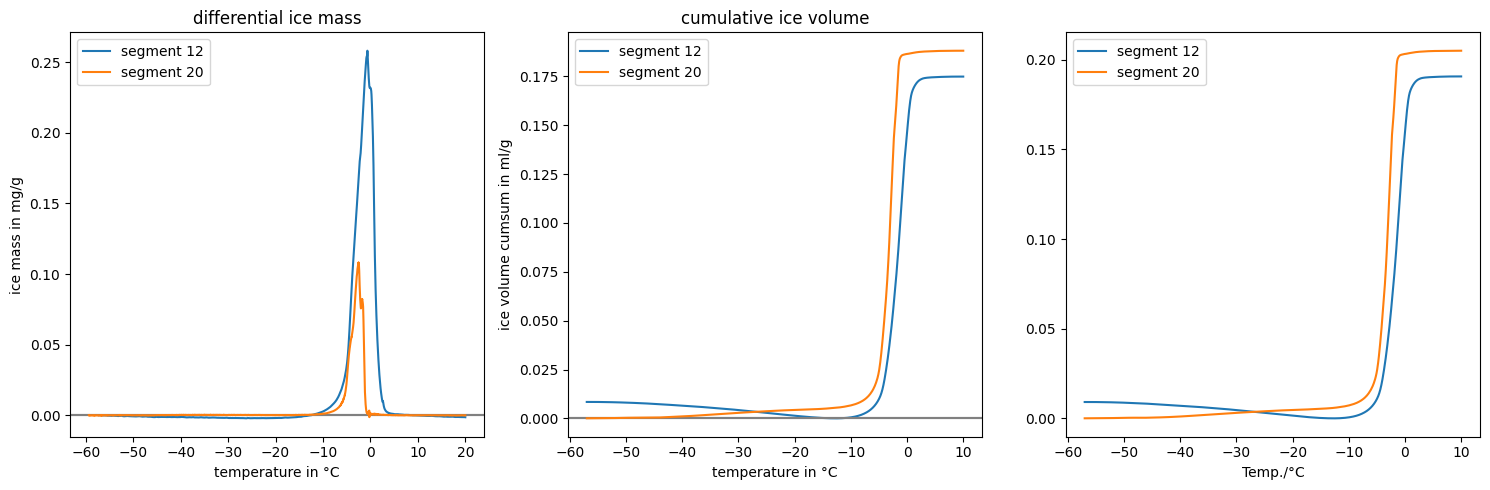

  ice mass difference: 13.24 mg/g


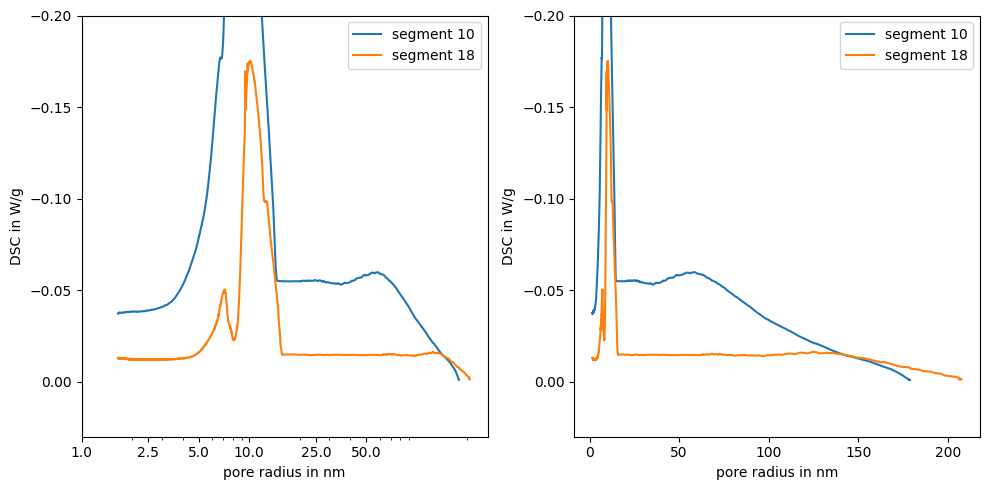


ExpDat_1.2-20nm.txt
  Found a valid experiment file. Encoding: UTF-16
  Loading 1.2-20nm
    - loaded measurement 1.2-20nm from 2022-01-05 17:48:00
    - The data contains 5.0 measurements per s


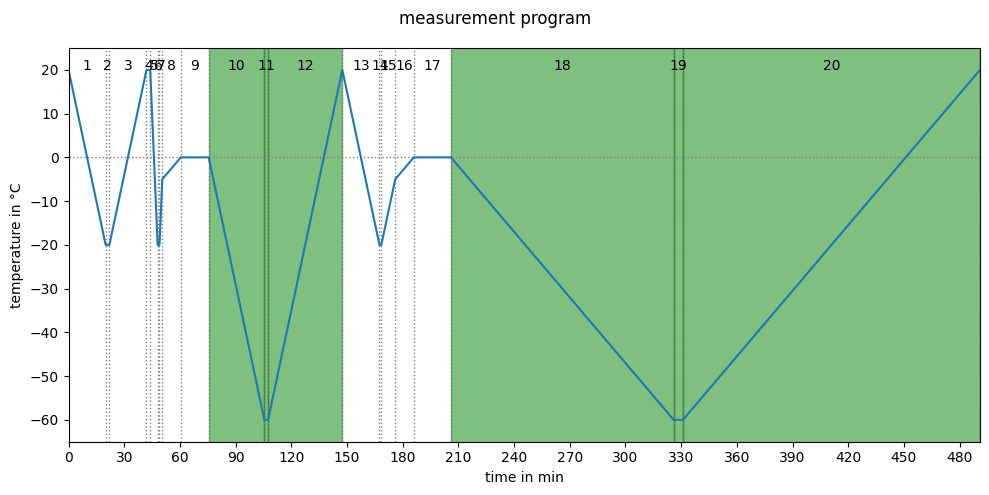

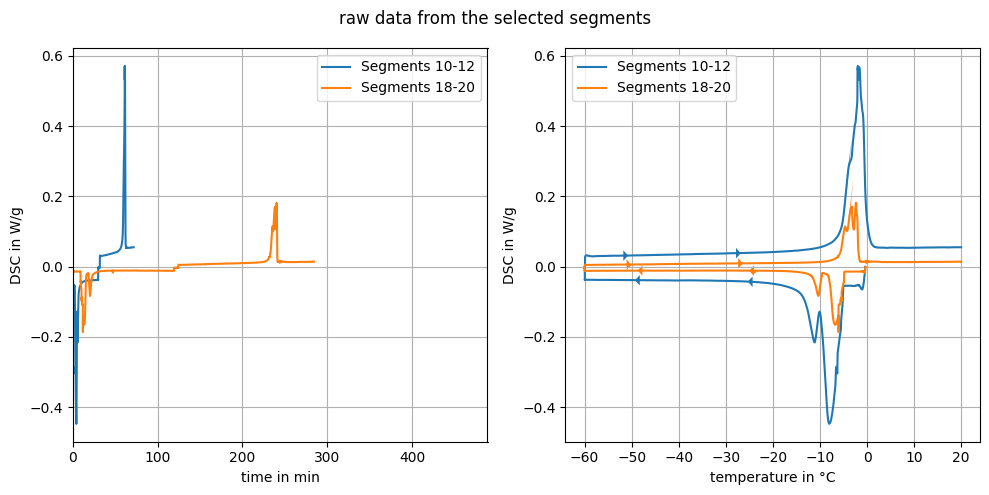

  Segment 12 baseline: y = 0.00070932*x + 0.02897882; R-squared value: 0.99997040
  Segment 20 baseline: y = 0.00005885*x + 0.00481742; R-squared value: 0.99953504


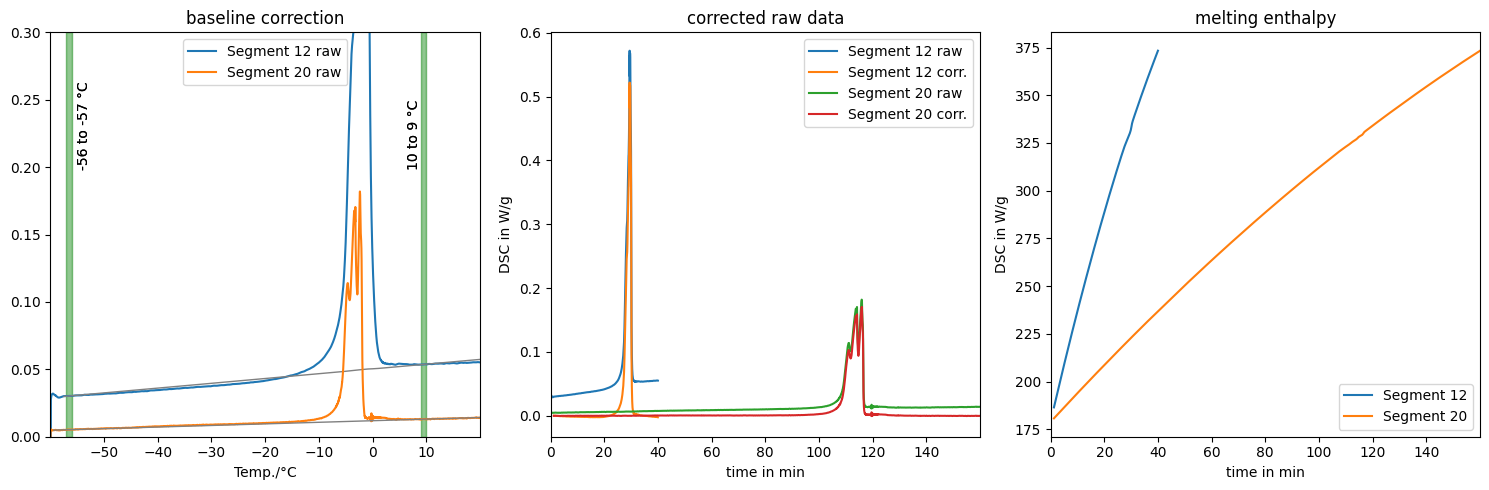

  (manual) ice mass/volume in segment 12 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 165.8 mg/g ; 180.8 µl/g
  (manual) ice mass/volume in segment 20 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 184.0 mg/g ; 200.5 µl/g


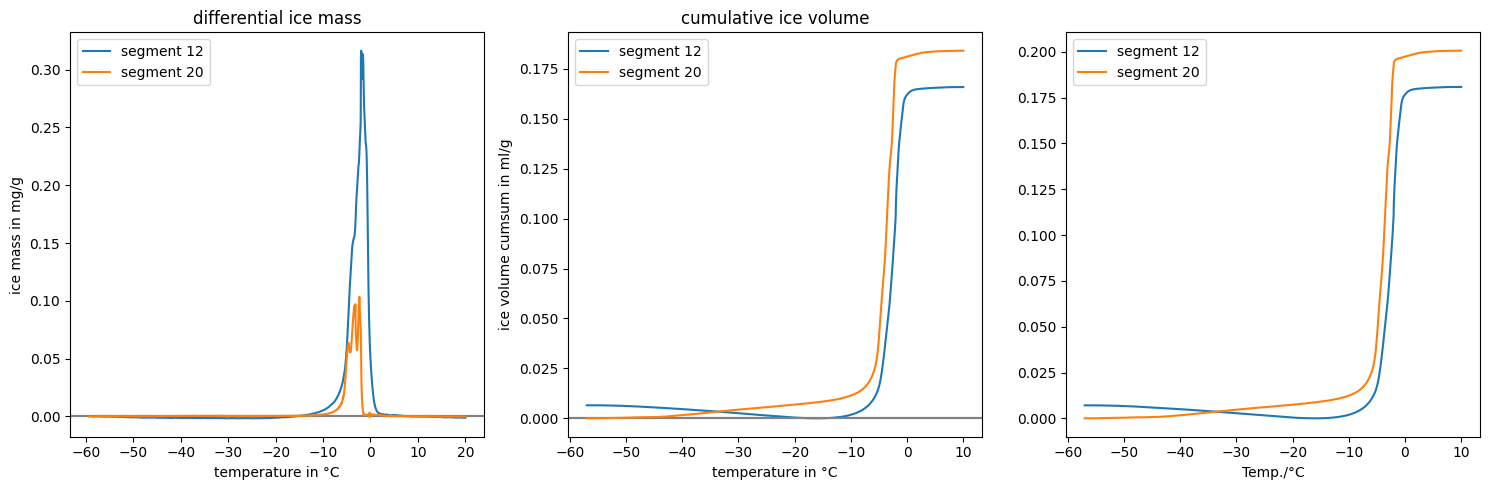

  ice mass difference: 18.20 mg/g


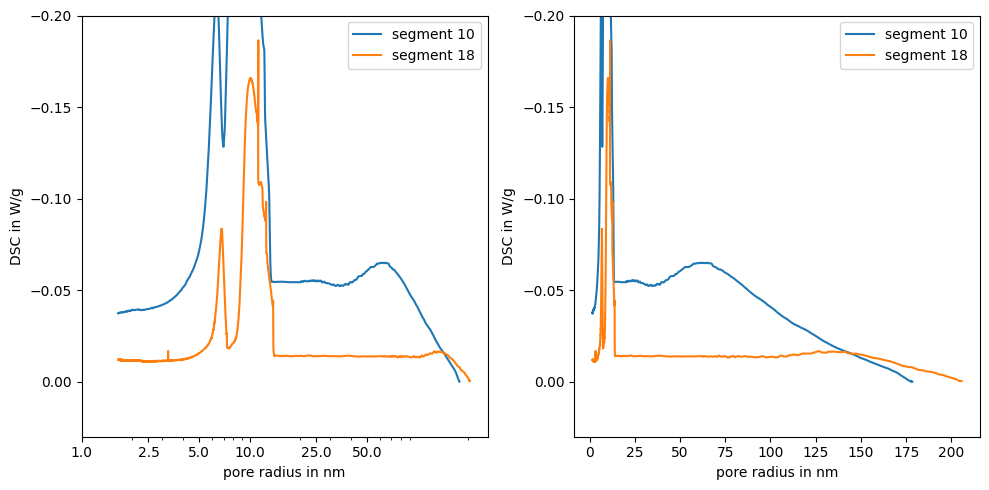


ExpDat_2.1-5nm.txt
  Found a valid experiment file. Encoding: UTF-16
  Loading 2.1-5nm
    - loaded measurement 2.1-5nm from 2022-01-06 09:14:00
    - The data contains 5.0 measurements per s


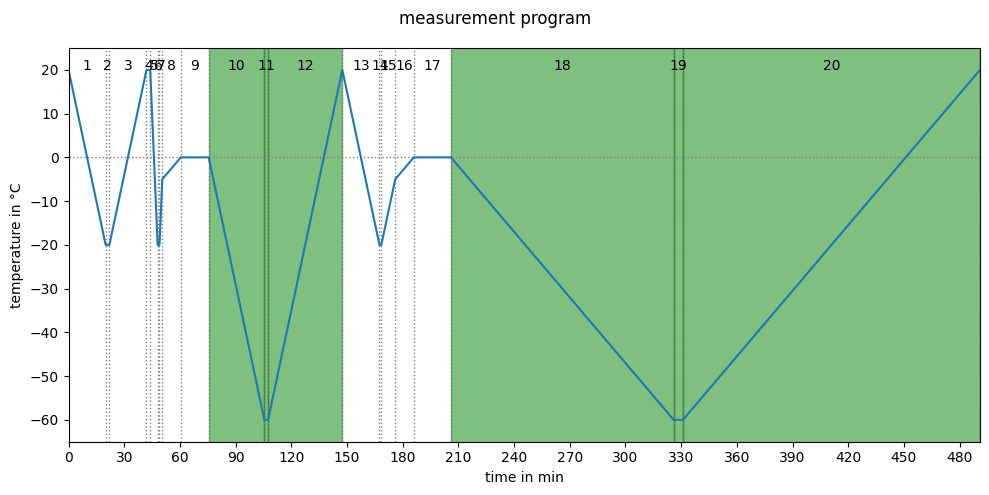

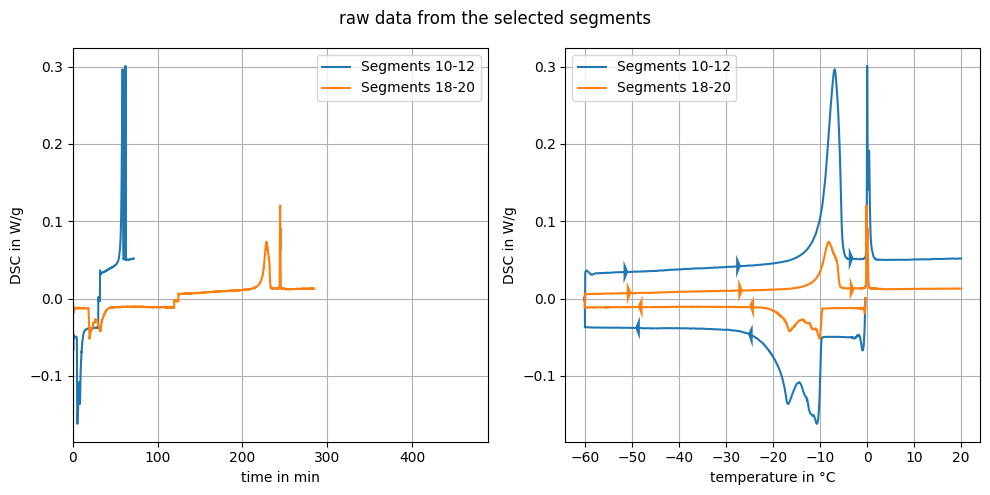

  Segment 12 baseline: y = 0.00052582*x + 0.03212757; R-squared value: 0.99994348
  Segment 20 baseline: y = 0.00004730*x + 0.00588439; R-squared value: 0.99811592


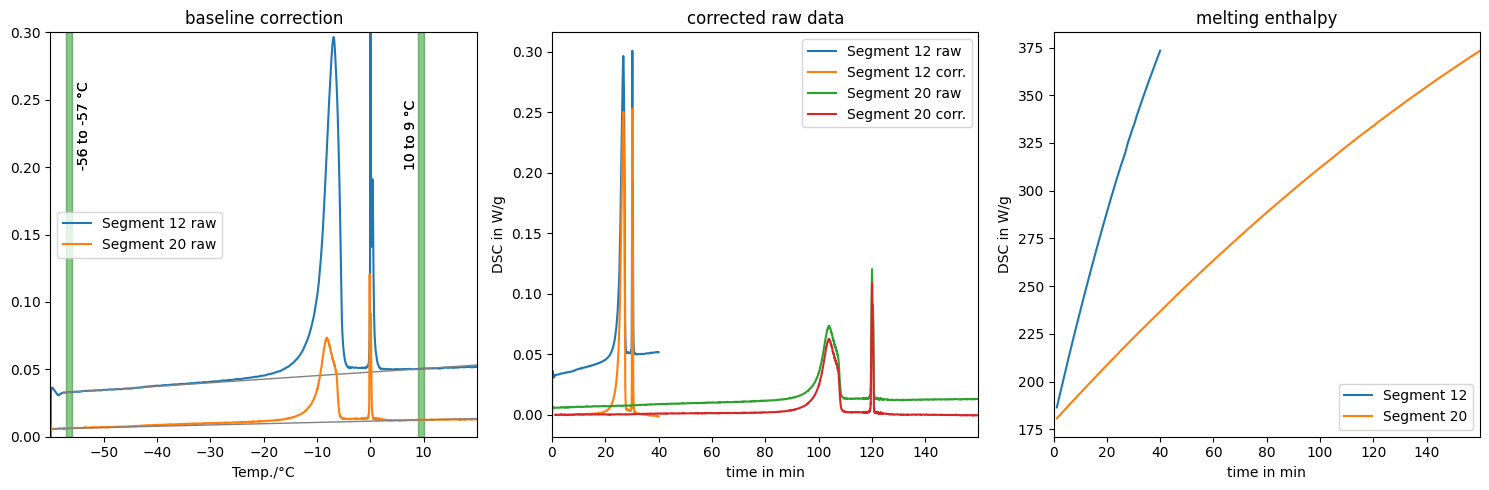

  (manual) ice mass/volume in segment 12 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 104.9 mg/g ; 114.3 µl/g
  (manual) ice mass/volume in segment 20 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 127.8 mg/g ; 139.1 µl/g


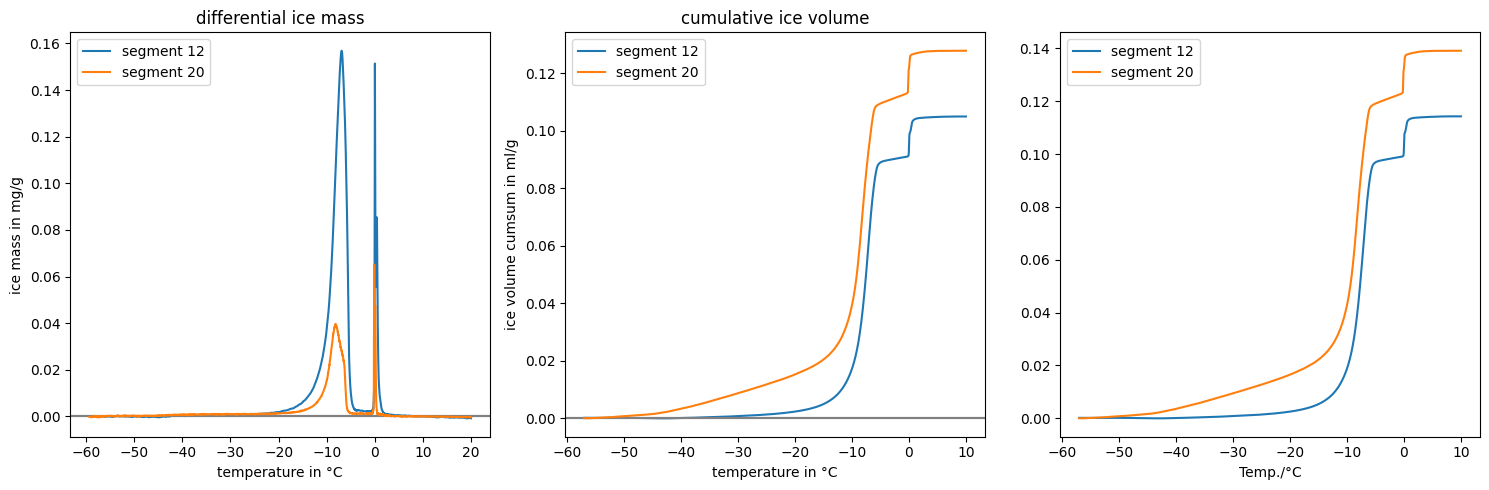

  ice mass difference: 22.87 mg/g


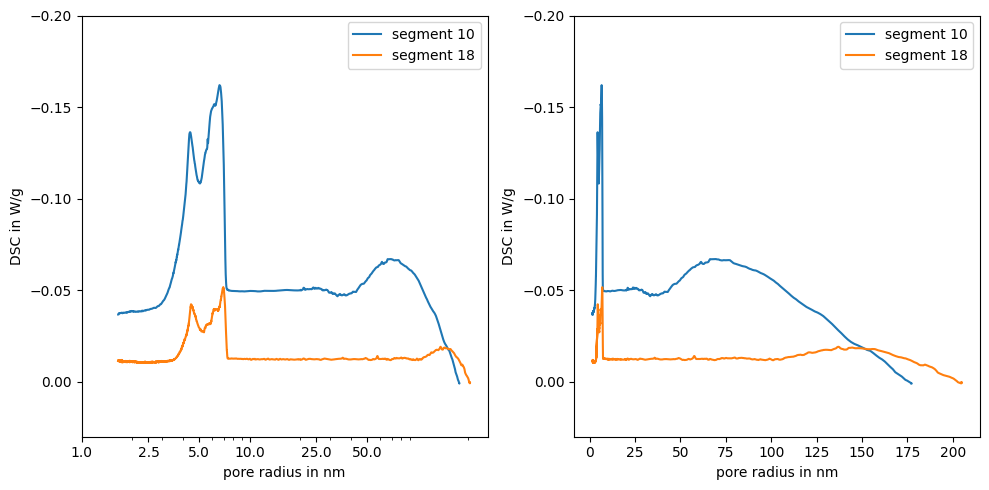


ExpDat_2.2-5nm.txt
  Found a valid experiment file. Encoding: UTF-16
  Loading 2.2-5nm
    - loaded measurement 2.2-5nm from 2022-01-06 19:17:00
    - The data contains 5.0 measurements per s


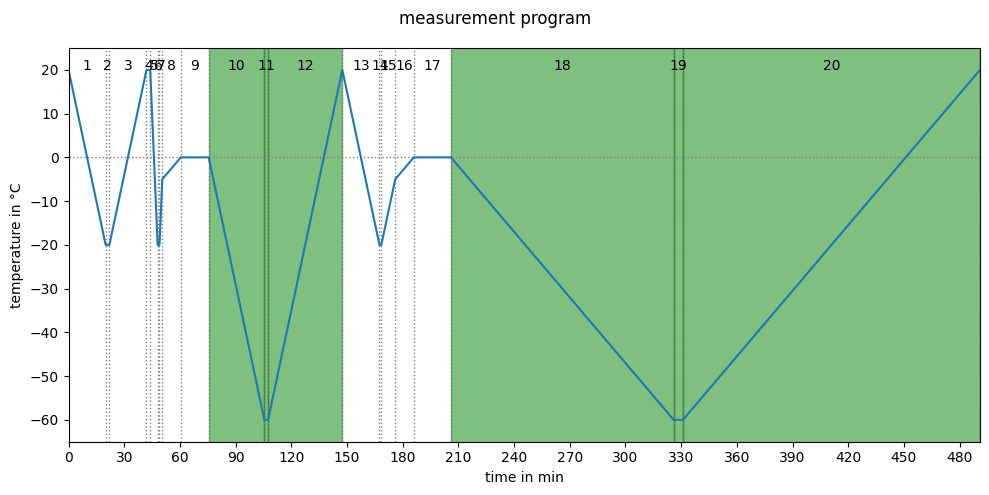

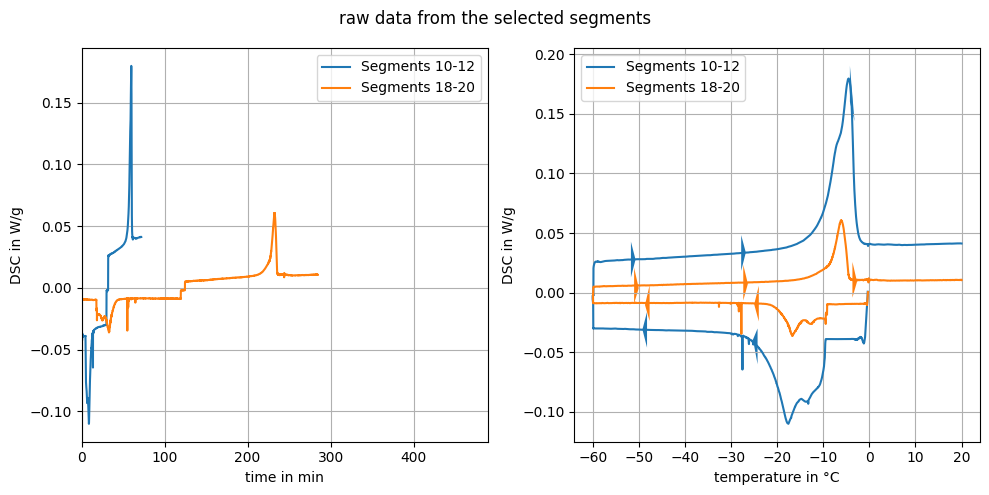

  Segment 12 baseline: y = 0.00040648*x + 0.02597572; R-squared value: 0.99997149
  Segment 20 baseline: y = 0.00003636*x + 0.00512008; R-squared value: 0.99940152


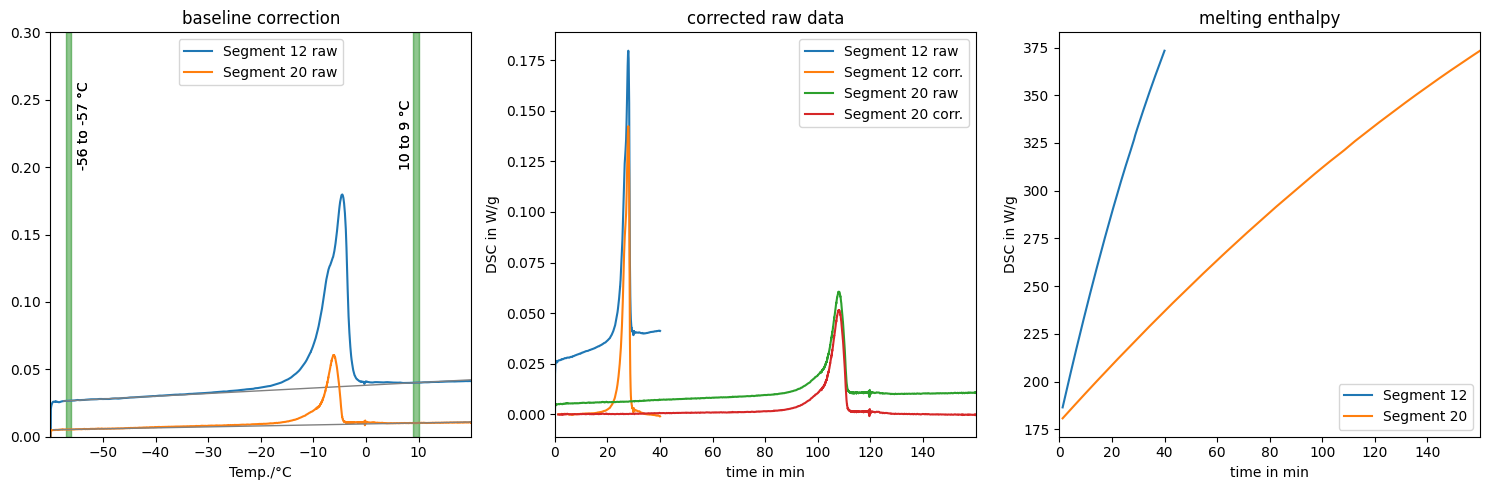

  (manual) ice mass/volume in segment 12 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 71.4 mg/g ; 77.8 µl/g
  (manual) ice mass/volume in segment 20 between [-57, -56] to [9, 10] and [-57, -56] to [9, 10] °C: 86.0 mg/g ; 93.6 µl/g


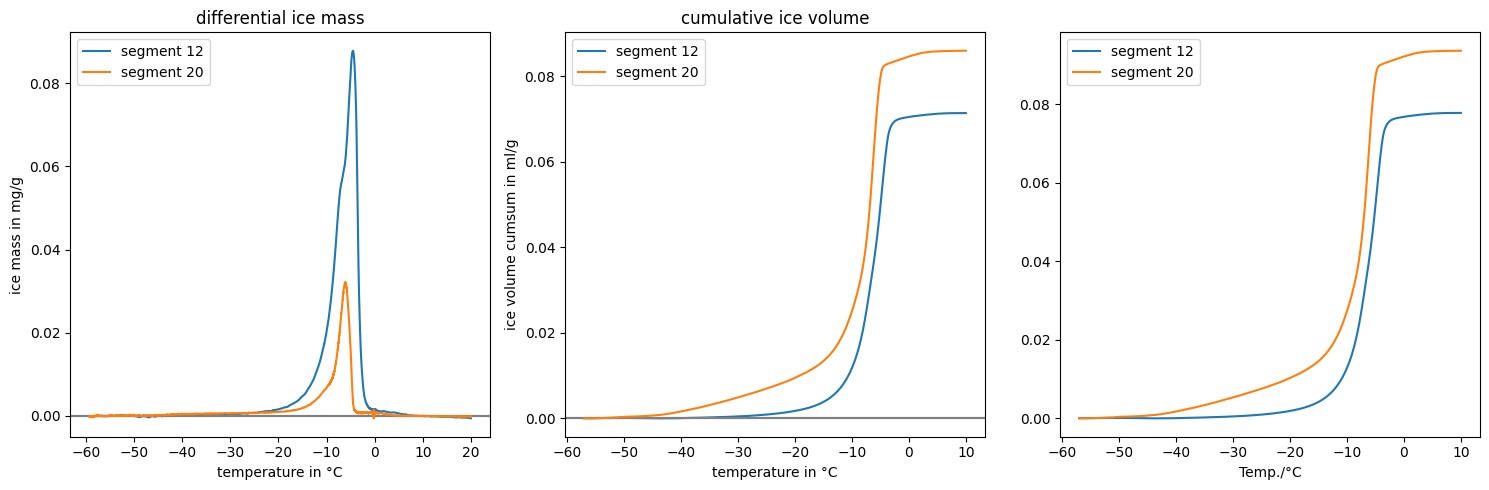

  ice mass difference: 14.59 mg/g


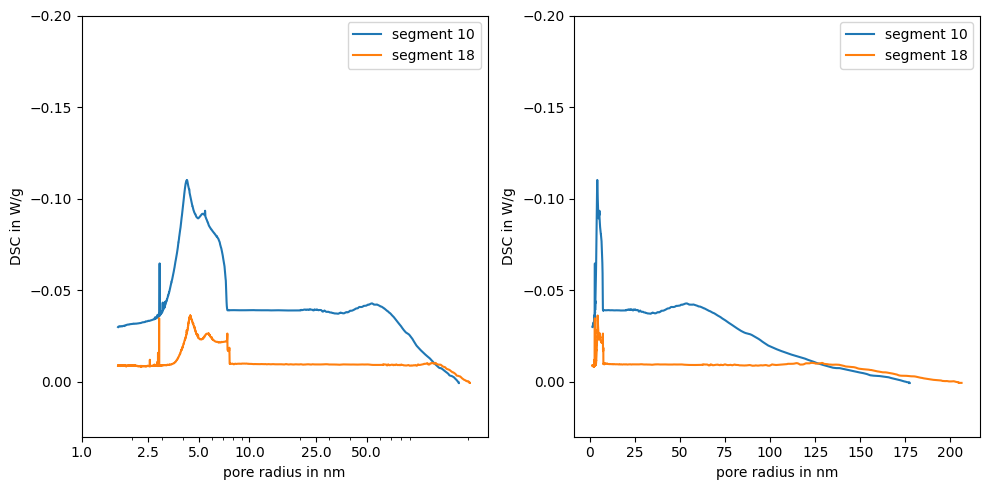

In [4]:
directory, materials = load_multiple_experiments( measure_segments, thaw_temp_range, T_range, True )
specimen_ages = ['1d','7d','14d','21d','28d']
ice_dataframe, ice_stat_dataframe = process_ice_mass_dev( materials, specimen_ages )
    

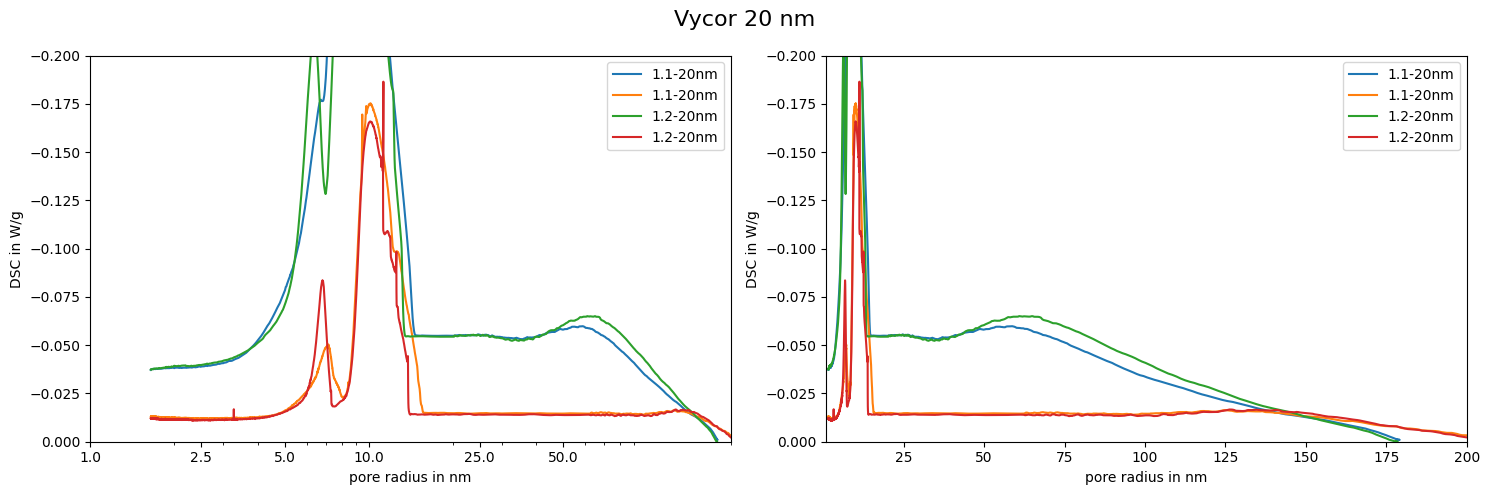

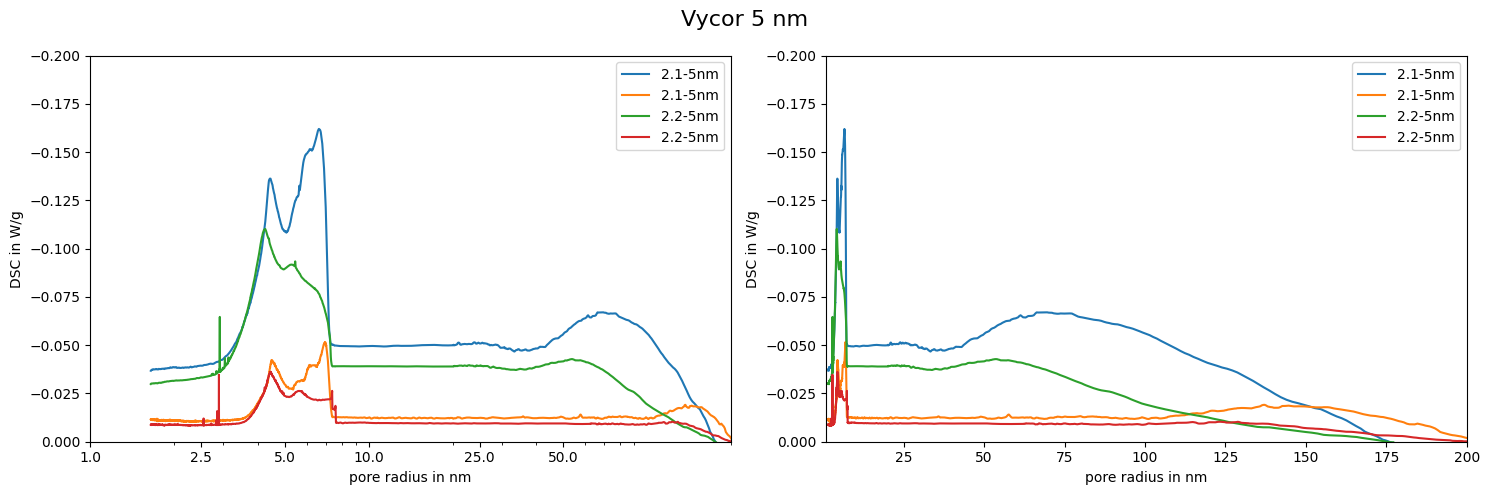

In [5]:

for experiment in materials.keys():
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    fig.suptitle(experiment, fontsize=16)
    for key, data in materials[experiment].items():
        for k, measure_segment in enumerate(measure_segments):
            for i in [0,1]:
                df_s = data.raw_data[(data.raw_data['Segment'] == measure_segment[0])]
                
                df_s.plot(             y='DSC/(mW/mg)', x ='pore radius in nm', ax=ax[i], label=key.format( measure_segment[0] ))
                ax[i].set_ylim(0,-.2)
                ax[i].set_xlim([1,200])
                ax[i].set_xlabel('pore radius in nm')
                ax[i].set_ylabel('DSC in W/g')
    ax[0].set_xscale('log')
    ax[0].set_xticks([1,2.5,5,10,25,50])
    ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.tight_layout()
    plt.show()